## ÖDEV - 1, ANALİZ

In [1]:
#Kütüphâneleri ekleme:
import numpy as nm
import pandas as pa
import matplotlib.pyplot as py
import seaborn as sb

In [2]:
#Veri setini yükleme:
data = pa.read_csv("exams-dataset-final.csv")

In [478]:
#Veriye önbakış:
size = len(data)
print('Veri büyüklüğü : ' + (str(size)))
data.head(5)

Veri büyüklüğü : 1000


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Veri üzerinde yapılması gereken ön işlemlerin tespiti:
• Veride boş satır veyâ sütun varsa, tespit edilmesi; satır yâ dâ sütun sayısı az ise çıkarılması, çok ise ortalama değerle doldurulması
• Verilerin merkezî eğilim ölçülerine bakılmalı
• Verilerin dağılımı kontrol edilmeli
• Verilerin önemli bir kısmı kategorik veri. İki kategoriden oluşan verileri 0 ve 1 olarak; 2'den fazla kategoriden oluşan verileri 'tek nokta matrisi' ('One Hot Vector') olarak kodlayabiliriz
• 

In [479]:
#Boş verilerin tespiti:
print('Veri setindeki sütunların içerdiği boş hücre sayıları:')
data.isnull().sum()

Veri setindeki sütunların içerdiği boş hücre sayıları:


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [480]:
#Verinin dağılımını incelemek , 1. Maddenin büyük kısmı:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Text(0.5, 1.0, 'Not dağılımları')

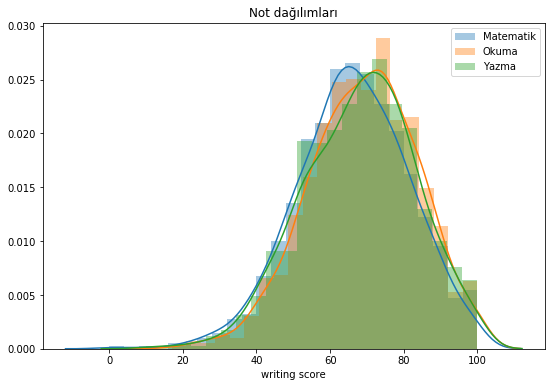

In [481]:
#Verideki not dağılımına grafik olarak bakarak, çeşitliliği görmek:
py.figure(figsize = (9,6))
sb.distplot(data['math score'], label = 'Matematik')
sb.distplot(data['reading score'], label = 'Okuma')
sb.distplot(data['writing score'], label = 'Yazma')
py.legend()
py.title("Not dağılımları")

NOT - 1 : Her not düzeyinden alan öğrencilerin olması verilerin çeşitliliğine işâret ettiğinden veri setinin analiz için uygun olabileceğini düşünebiliriz.

In [482]:
#Çift değerli - çok değerli sütunları keşfedelim:
for colName in data.columns[:]:
    print(colName + " sütunundaki farklı değer sayısı : " + str(data[colName].nunique()))

gender sütunundaki farklı değer sayısı : 2
race/ethnicity sütunundaki farklı değer sayısı : 5
parental level of education sütunundaki farklı değer sayısı : 6
lunch sütunundaki farklı değer sayısı : 2
test preparation course sütunundaki farklı değer sayısı : 2
math score sütunundaki farklı değer sayısı : 81
reading score sütunundaki farklı değer sayısı : 72
writing score sütunundaki farklı değer sayısı : 77


"gender", "lunch", "test preparation course" alanlarını 'bool' veri tipine çevirmeli;
"race/ethnicity" ve "parental level of education" alanlarını ise 'tek nokta vektörü'ne veyâ sıralı değere çevirebiliriz.
Ebeveynlerin eğitim düzeyi sıralı değere çevirmeye müsâittir; çünkü eğitim düzeyi yüksek olan kişi yüksek sayıyla ifâde..
.. edildiğinde sayısal olarak da büyük olması anlamlı olur.

In [483]:
#Diğer dağılımlara bakmadan evvel kategorik verileri sayısala çevirmeliyim.
#man = ["male" for i in data.loc[:,"gender"] if == "male"]
#genders = [0 for i in data.loc[:,'gender'] if i == "male" elif i == "female"]
sayac = 0
genders = [i for i in range(len(data))]
for i in data.loc[:, "gender"]:
    if i == "male":
        genders[sayac] = 1
    else:
        genders[sayac] = 0
    sayac += 1

In [484]:
#lunch, standard = 1, free/reduced = 0
sayac = 0
lunchs = [i for i in range(len(data))]
for i in data.loc[:, "lunch"]:
    if i == "standard":
        lunchs[sayac] = 1
    else:
        lunchs[sayac] = 0
    sayac += 1

In [485]:
#test preparation course, completed = 1, none = 0
sayac = 0
preCourses = [i for i in range(len(data))]
for i in data.loc[:, "test preparation course"]:
    if i == "completed":
        preCourses[sayac] = 1
    else:
        preCourses[sayac] = 0
    sayac += 1

In [486]:
mergedData = data.copy()
mergedData["gender"] = genders
mergedData["lunch"] = lunchs
mergedData["test preparation course"] = preCourses

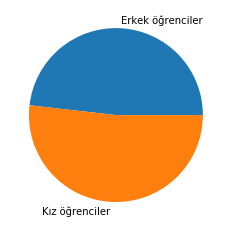

In [1196]:
# 2. Madde:

numberOfMales = len(data.loc[data["gender"] == 'male'])
numberOfFemales = len(data) - numberOfMales

py.figure(figsize = (7,4))
py.pie([numberOfMales, numberOfFemales], labels = ["Erkek öğrenciler", "Kız öğrenciler"])
py.savefig("Kız - erkek dağılımı", dpi = 220)
py.show()

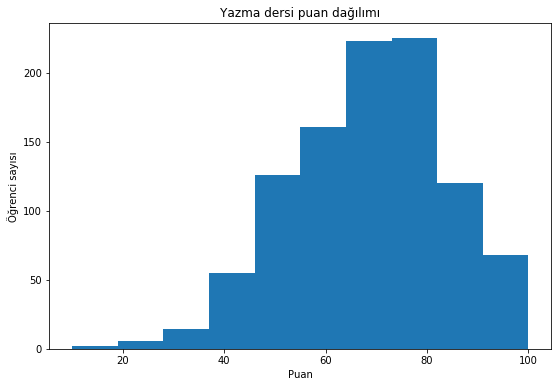

In [1238]:
py.figure(figsize = (9, 6))
py.hist(data["writing score"])
py.xlabel("Puan")
py.ylabel("Öğrenci sayısı")
py.title(label = "Yazma dersi puan dağılımı")
py.savefig("Yazma puan dağılımı", dpi = 220)
py.show()

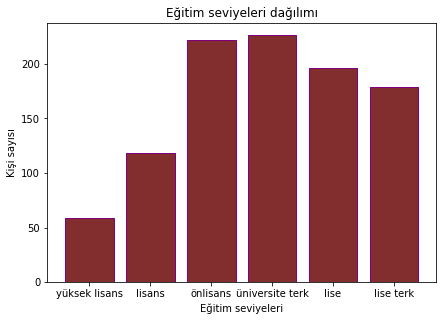

In [3]:
# 3. Madde:
levels = ["yüksek lisans", "lisans", "önlisans", "üniversite terk", "lise", "lise terk"]
eduSeries = data.groupby("parental level of education").count().iloc[:]["gender"]
edu = [i for i in range(0,6)]
edu[0] = eduSeries.loc["master's degree"]#yüksek lisans
edu[1] = eduSeries.loc["bachelor's degree"]#lisans
edu[2] = eduSeries.loc["associate's degree"]#önlisans
edu[3] = eduSeries.loc["some college"]#üniversite terk
edu[4] = eduSeries.loc["high school"]#lise
edu[5] = eduSeries.loc["some high school"]#lise terk

figEdu = py.figure()
ax1 = figEdu.add_axes([0.1, 0.1, 0.9, 0.9])

ax1.set_xlabel("Eğitim seviyeleri")
ax1.set_ylabel("Kişi sayısı")
ax1.set_title("Eğitim seviyeleri dağılımı")

#ax1.plot(levels, edu, "*:b", mfc = "purple")
ax1.bar(levels, edu, color = "#822E2E", edgecolor = "purple")
figEdu.savefig("Ebeveyn eğitim düzeyleri", dpi = 200)

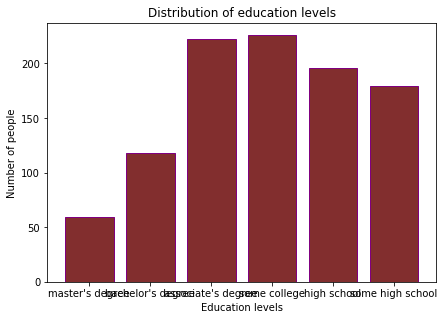

In [5]:
levels = ["master's degree", "bachelor's degree", "associate's degree", "some college", "high school", "some high school"]
eduSeries = data.groupby("parental level of education").count().iloc[:]["gender"]
edu = [i for i in range(0,6)]
edu[0] = eduSeries.loc["master's degree"]#yüksek lisans
edu[1] = eduSeries.loc["bachelor's degree"]#lisans
edu[2] = eduSeries.loc["associate's degree"]#önlisans
edu[3] = eduSeries.loc["some college"]#üniversite terk
edu[4] = eduSeries.loc["high school"]#lise
edu[5] = eduSeries.loc["some high school"]#lise terk

figEdu = py.figure()
ax1 = figEdu.add_axes([0.1, 0.1, 0.9, 0.9])

ax1.set_xlabel("Education levels")
ax1.set_ylabel("Number of people")
ax1.set_title("Distribution of education levels")

#ax1.plot(levels, edu, "*:b", mfc = "purple")
ax1.bar(levels, edu, color = "#822E2E", edgecolor = "purple")
figEdu.savefig("Ebeveyn eğitim düzeyleri - İNGİLİZCE", dpi = 200)

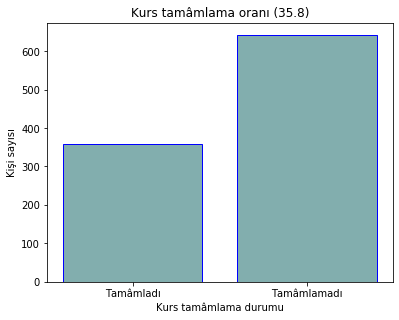

In [1352]:
# 4. Madde:
finished = data.loc[data["test preparation course"] == 'completed'].count()[0]
notFinished = data.loc[data["test preparation course"] == 'none'].count()[0]
courseCompleteRate = round ((finished / len(data))* 100, 3)

figCourse = py.figure()
courseAx1 = figCourse.add_axes([0.1, 0.1, 0.8, 0.9])
courseAx1.set_xlabel("Kurs tamâmlama durumu")
courseAx1.set_ylabel("Kişi sayısı")
courseAx1.set_title("Kurs tamâmlama oranı (" + str(courseCompleteRate) + ")")


courseAx1.bar(["Tamâmladı", "Tamâmlamadı"], [finished, notFinished], color = "#82AEAE", edgecolor = "blue")
figCourse.savefig("Kurs tamâmlama oranları", dpi = 200)

In [487]:
#Ebeveynlerin eğitim seviyeleri kaç farklı değerden oluşuyor?
mergedData["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [488]:
#Eğitim seviyesini sıralı vektöre çevirelim:
#master's degree = yüksek lisans = 6
#bachelor's degree = lisans = 5
#associate's degree = önlisans = 4
#some college = bir üniversite veyâ üniversitenin bir kısmı = 3
#high school = lise = 2
#some high school = lisenin bir kısmı = 1
switch = {
    "master's degree" : 6,
    "bachelor's degree" : 5,
    "associate's degree" : 4,
    "some college" : 3,
    "high school" : 2,
    "some high school" : 1,
}
sayac = 0
educationLevels = [i for i in range(len(data))]
for i in data.loc[:,"parental level of education"]:
    educationLevels[sayac] = switch.get(i)
    sayac += 1

In [489]:
mergedData["parental level of education"] = educationLevels

In [490]:
mergedData.corr()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.043934,0.021372,0.006028,0.167982,-0.244313,-0.301225
parental level of education,-0.043934,1.000000,-0.023259,-0.007143,0.159432,0.190908,0.236715
lunch,0.021372,-0.023259,1.000000,-0.017044,0.350877,0.229560,0.245769
test preparation course,0.006028,-0.007143,-0.017044,1.000000,0.177702,0.241780,0.312946
math score,0.167982,0.159432,0.350877,0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,0.190908,0.229560,0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,0.236715,0.245769,0.312946,0.802642,0.954598,1.000000


Korelasyon sonuçlarından "hazırlık kursu" okumanın başarıyı yaklaşık %20 - %30 olarak arttırıldığı görülüyor; bilhassa..
okul öncesi eğitim almanın yâ dâ hâzırlık kursu almanın 'yazma' dersine etkisi daha fazla, beklenildiği gibi...

Daha yakından bakmak için öğrencileri ebeveynlerinin eğitim seviyesine göre gruplandıralım.

In [491]:
master = [i for i in range(0,7)]
for i in range(1,7):
    master[i] = mergedData.loc[mergedData.loc[:,"parental level of education"] == i]

Ebeveynlerin eğitim seviyelerine göre frekanslara bakalım:

In [492]:
indexes = ["yüksek lisans", "lisans", "önlisans", "üniversite terk", "lise", "lise terk"]
colNames = ["Velisi olunan toplam öğrenci sayısı"]
col1Data = [i for i in range(0,6)]
sayac = 5
for i in master[1:]:
    col1Data[sayac] = len(i)
    sayac -= 1
parentFrq = pa.DataFrame(data = col1Data, index = indexes, columns = colNames)
parentFrq

,Velisi olunan toplam öğrenci sayısı
yüksek lisans,59
lisans,118
önlisans,222
üniversite terk,226
lise,196
lise terk,179


Şimdi de öğrencilerin notlarını kümeleyelim ve her velî grubunun çocuklarının her ders için başarı seviyelerine bakalım:

Küme sayımızı belirlemek için bir işlem yapmaya girişmeyelim ve ülkemizdekine benzer şekilde 5 kümeye (çok zayıf, zayıf, orta, iyi, pekiyi) ayıralım ve bunları da mergedData'ya yeni sütun olarak ekleyelim; ardından frekanslarını hesâplayıp, 'parentFrq' tablosuna eklemeliyiz:
0 - 24 : Çok zayıf (too bad mark)
25 - 44 : Zayıf (bad mark)
45 - 69 : Orta (medium)
70 - 84 : İyi (good)
85 - 100 : Pekiyi (very good)

In [493]:
successLevelityOfMath = [i for i in range(0,len(mergedData))]
successLevelityOfReading = [i for i in range(0,len(mergedData))]
successLevelityOfWriting = [i for i in range(0,len(mergedData))]

mathScoresLevel = mergedData["math score"]
readingScoresLevel = mergedData["reading score"]
writingScoresLevel = mergedData["writing score"]

sayac = 0
for i in mathScoresLevel:
    if i < 25:
        successLevelityOfMath[sayac] = "too bad mark"
    elif i < 45:
        successLevelityOfMath[sayac] = "bad mark"
    elif i < 70:
        successLevelityOfMath[sayac] = "medium"
    elif i < 85:
        successLevelityOfMath[sayac] = "good"
    elif i <= 100:
        successLevelityOfMath[sayac] = "very good"
    sayac += 1

sayac = 0
for i in readingScoresLevel:
    if i < 25:
        successLevelityOfReading[sayac] = "too bad mark"
    elif i < 45:
        successLevelityOfReading[sayac] = "bad mark"
    elif i < 70:
        successLevelityOfReading[sayac] = "medium"
    elif i < 85:
        successLevelityOfReading[sayac] = "good"
    elif i <= 100:
        successLevelityOfReading[sayac] = "very good"
    sayac += 1

sayac = 0
for i in writingScoresLevel:
    if i < 25:
        successLevelityOfWriting[sayac] = "too bad mark"
    elif i < 45:
        successLevelityOfWriting[sayac] = "bad mark"
    elif i < 70:
        successLevelityOfWriting[sayac] = "medium"
    elif i < 85:
        successLevelityOfWriting[sayac] = "good"
    elif i <= 100:
        successLevelityOfWriting[sayac] = "very good"
    sayac += 1

mergedData["math success level"] = successLevelityOfMath
mergedData["reading success level"] = successLevelityOfReading
mergedData["writing success level"] = successLevelityOfWriting

In [494]:
#'Yüksek lisans mezunu velîlerin öğrencilerinin %80'i matematik dersinden çok iyi not alıyor' gibi istatistikler çıkarmalıyım

In [495]:
#Her ders için notları 'iyi' ve 'pekiyi' olan öğrencileri 'başarılı' olarak kabûl edelim; bu 'başarı'ya göre sınıflama yapalım:
successfulStudentsOnMath = mergedData.loc[mergedData["math success level"] == "good"]
successfulStudentsOnMath2 = mergedData.loc[mergedData["math success level"] == "very good"]
successfulStudentsOnMath = pa.concat([successfulStudentsOnMath, successfulStudentsOnMath2], axis = 0)


successfulStudentsOnReading = mergedData.loc[mergedData["reading success level"] == "good"]
successfulStudentsOnReading2 = mergedData.loc[mergedData["reading success level"] == "very good"]
successfulStudentsOnReading = pa.concat([successfulStudentsOnReading, successfulStudentsOnReading2], axis = 0)


successfulStudentsOnWriting = mergedData.loc[mergedData["writing success level"] == "good"]
successfulStudentsOnWriting2 = mergedData.loc[mergedData["writing success level"] == "very good"]
successfulStudentsOnWriting = pa.concat([successfulStudentsOnWriting, successfulStudentsOnWriting2], axis = 0)


In [496]:
#Başarılı öğrencileri velîlerinin eğitim seviyesine göre sınıflandıralım ve bunu velî sınıflandırma tablosuna sütun olarak..
#.. ekleyelim:
classifiedMath = successfulStudentsOnMath.groupby("parental level of education").count().reset_index()
classifiedReading = successfulStudentsOnReading.groupby("parental level of education").count().reset_index()
classifiedWriting = successfulStudentsOnWriting.groupby("parental level of education").count().reset_index()

mathSuccessCount = [i for i in range(0,6)]
readingSuccessCount = [i for i in range(0,6)]
writingSuccessCount = [i for i in range(0,6)]

for i in range(0,6):
    mathSuccessCount[5 - i] = classifiedMath.loc[i]["math score"]
    readingSuccessCount[5 - i] = classifiedReading.loc[i]["math score"]
    writingSuccessCount[5 - i] = classifiedWriting.loc[i]["math score"]

#Tabloya ekleyelim:
parentFrq["Matematikte başarılı öğrenci sayısı"] = mathSuccessCount
parentFrq["Okumada başarılı öğrenci sayısı"] = readingSuccessCount
parentFrq["Yazmada başarılı öğrenci sayısı"] = writingSuccessCount
parentFrq

,Velisi olunan toplam öğrenci sayısı,Matematikte başarılı öğrenci sayısı,Okumada başarılı öğrenci sayısı,Yazmada başarılı öğrenci sayısı
yüksek lisans,59,33,38,39
lisans,118,56,72,74
önlisans,222,98,126,118
üniversite terk,226,93,118,118
lise,196,63,79,65
lise terk,179,66,80,75


In [497]:
#Toplam öğrenci sayısına göre oranlanırsa;:.
totalStudents = parentFrq["Velisi olunan toplam öğrenci sayısı"]
mathSuccessAsPerParentEducation = [i for i in range(0,6)]
readingSuccessAsPerParentEducation = [i for i in range(0,6)]
writingSuccessAsPerParentEducation = [i for i in range(0,6)]
for i in range(0,6):
    mathSuccessAsPerParentEducation[i] = mathSuccessCount[i] / totalStudents[i]
    readingSuccessAsPerParentEducation[i] = readingSuccessCount[i] / totalStudents[i]
    writingSuccessAsPerParentEducation[i] = writingSuccessCount[i] / totalStudents[i]
mathSuccessAsPerParentEducation[0]

#Yüzdeye çevirelim:
func = lambda x: round((x * 100),2)
mathSuccessAsPerParentEducation = [func(i) for i in mathSuccessAsPerParentEducation]
readingSuccessAsPerParentEducation = [func(i) for i in readingSuccessAsPerParentEducation]
writingSuccessAsPerParentEducation = [func(i) for i in writingSuccessAsPerParentEducation]
#Bunu da sütun olarak ekleyelim:
parentFrq["Ortalama matematik başarısı"] = mathSuccessAsPerParentEducation
parentFrq["Ortalama okuma başarısı"] = readingSuccessAsPerParentEducation
parentFrq["Ortalama yazma başarısı"] = writingSuccessAsPerParentEducation
parentFrq

,Velisi olunan toplam öğrenci sayısı,Matematikte başarılı öğrenci sayısı,Okumada başarılı öğrenci sayısı,Yazmada başarılı öğrenci sayısı,Ortalama matematik başarısı,Ortalama okuma başarısı,Ortalama yazma başarısı
yüksek lisans,59,33,38,39,55.93,64.41,66.10
lisans,118,56,72,74,47.46,61.02,62.71
önlisans,222,98,126,118,44.14,56.76,53.15
üniversite terk,226,93,118,118,41.15,52.21,52.21
lise,196,63,79,65,32.14,40.31,33.16
lise terk,179,66,80,75,36.87,44.69,41.90


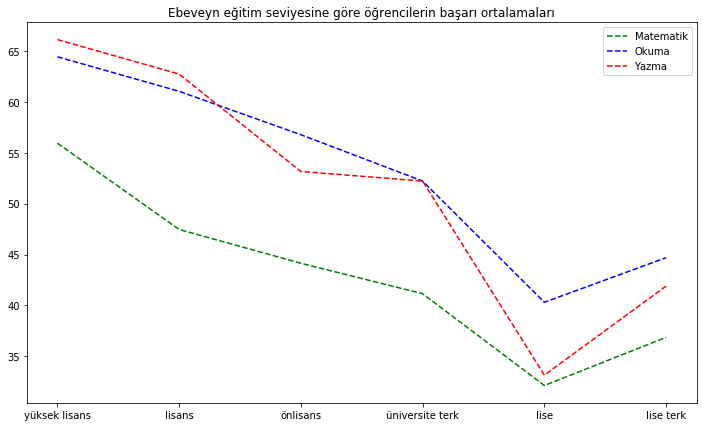

In [1098]:
#Grafik üzerinde bakmalıyım:
py.figure(figsize=(12,7))
py.plot(parentFrq.index, parentFrq["Ortalama matematik başarısı"], "--g", label = "Matematik")
py.plot(parentFrq.index, parentFrq["Ortalama okuma başarısı"], "--b", label = "Okuma")
py.plot(parentFrq.index, parentFrq["Ortalama yazma başarısı"], "--r", label = "Yazma")
py.title("Ebeveyn eğitim seviyesine göre öğrencilerin başarı ortalamaları")
py.legend()
py.savefig("Ebeveyn eğitim seviyesine göre öğrencilerin başarıları", dpi = 220)

In [499]:
#Görüldüğü üzere ebeveynlerin eğitim seviyesine göre öğrencilerin başarılarına baktığımızda ebeveyn eğitim seviyesinin öğrenci..
#.. başarısı üzerinde müsbet bir etkisi var. Onun dışında eğitim seviyesinin her ders için başarıyı birbirlerine yakın oranda..
#.. etkilediği görülüyor.
#Öğrencilerin en başarısız olduğu dersin matematik olduğu görülüyor.

Şimdi de öğle yemeği yemenin dersler üzerindeki etkisini ve hangi dersi daha çok etkilediğini araştıralım:

In [500]:
standardLunch = mergedData.loc[mergedData["lunch"] == 1]
reducedLunch = mergedData.loc[mergedData["lunch"] == 0]

print("Standart menü yemek yiyen öğrenci sayısı : " + str(standardLunch.count()[0]))
print("Ücretsiz / indirimli menü yemek yiyen öğrenci sayısı : " + str(reducedLunch.count()[0]))

#Öğrenci başarısı oranına bakalım:

standardLunchSuccessMath = ((len(standardLunch[standardLunch["math success level"] == "good"]) + len(standardLunch[standardLunch["math success level"] == "very good"]))) / len(standardLunch)
reducedLunchSuccessMath = (len(reducedLunch[reducedLunch["math success level"] == "good"]) + len(reducedLunch[reducedLunch["math success level"] == "very good"])) / len(reducedLunch)

standardLunchSuccessReading = (len(standardLunch[standardLunch["reading success level"] == "good"]) + len(standardLunch[standardLunch["reading success level"] == "very good"])) / len(standardLunch)
reducedLunchSuccessReading = (len(reducedLunch[reducedLunch["reading success level"] == "good"]) + len(reducedLunch[reducedLunch["reading success level"] == "very good"])) / len(reducedLunch)

standardLunchSuccessWriting = (len(standardLunch[standardLunch["writing success level"] == "good"]) + len(standardLunch[standardLunch["writing success level"] == "very good"])) / len(standardLunch)
reducedLunchSuccessWriting = (len(reducedLunch[reducedLunch["writing success level"] == "good"]) + len(reducedLunch[reducedLunch["writing success level"] == "very good"])) / len(reducedLunch)


standardLunchSuccessMath = func(standardLunchSuccessMath)
standardLunchSuccessReading = func(standardLunchSuccessReading)
standardLunchSuccessWriting = func(standardLunchSuccessWriting)

reducedLunchSuccessMath = func(reducedLunchSuccessMath)
reducedLunchSuccessReading = func(reducedLunchSuccessReading)
reducedLunchSuccessWriting = func(reducedLunchSuccessWriting)


fCols = ["Öğrenci sayısı", "Matematik başarı seviyesi", "Okuma başarı seviyesi", "Yazma başarı seviyesi"]
lunchFrq = pa.DataFrame(data = [[len(standardLunch), standardLunchSuccessMath, standardLunchSuccessReading, standardLunchSuccessWriting],
                                [len(reducedLunch), reducedLunchSuccessMath, reducedLunchSuccessReading, reducedLunchSuccessWriting]],
index = ["Standart", "Ücretsiz / indirimli"], columns = fCols)
lunchFrq

Standart menü yemek yiyen öğrenci sayısı : 645
Ücretsiz / indirimli menü yemek yiyen öğrenci sayısı : 355


,Öğrenci sayısı,Matematik başarı seviyesi,Okuma başarı seviyesi,Yazma başarı seviyesi
Standart,645,49.92,58.29,55.97
Ücretsiz / indirimli,355,24.51,38.59,36.06


Görülebileceği üzere standart yemek yiyen öğrenciler, indirimli - ücretsiz yemek yiyen öğrencilerden çok daha başarılı.
Öğle yemeği menüsünün öğrencilerin hangi derslerinde daha etkili olabileceğine göz atalım:

In [501]:
coeffOnMath = (lunchFrq["Matematik başarı seviyesi"][0] / lunchFrq["Matematik başarı seviyesi"][1]).round(2)
coeffOnReading = (lunchFrq["Okuma başarı seviyesi"][0] / lunchFrq["Okuma başarı seviyesi"][1]).round(2)
coeffOnWriting = (lunchFrq["Yazma başarı seviyesi"][0] / lunchFrq["Yazma başarı seviyesi"][1]).round(2)
print("Standart menü yemek yiyen öğrenciler matematik dersinde " + str(coeffOnMath) + " kat daha başarılı")
print("Standart menü yemek yiyen öğrenciler okuma dersinde " + str(coeffOnReading) + " kat daha başarılı")
print("Standart menü yemek yiyen öğrenciler yazma dersinde " + str(coeffOnWriting) + " kat daha başarılı")

print((coeffOnMath / coeffOnReading).round(2))
print((coeffOnMath / coeffOnWriting).round(2))
print("Öğle yemeği menüsünün standart menü olması, matematik dersini diğer derslerden yaklaşık 1.3 kat daha fazla etkiliyor olabilir")

Standart menü yemek yiyen öğrenciler matematik dersinde 2.04 kat daha başarılı
Standart menü yemek yiyen öğrenciler okuma dersinde 1.51 kat daha başarılı
Standart menü yemek yiyen öğrenciler yazma dersinde 1.55 kat daha başarılı
1.35
1.32
Öğle yemeği menüsünün standart menü olması, matematik dersini diğer derslerden yaklaşık 1.3 kat daha fazla etkiliyor olabilir


Şimdi ırklara göre öğrenci başarılarına bakmaya çalışalım inşâAllâh:

In [502]:
ethnicities = mergedData["race/ethnicity"].unique()
ethnicNumber = len(ethnicities)
dfEthnics = [i for i in range(0, ethnicNumber)]
print(str(ethnicNumber) + " etnik grup / ırk var")

for i in range(0, ethnicNumber):
    dfEthnics[i] = mergedData.loc[:][mergedData["race/ethnicity"] == ethnicities[i]]

col1Data = [dfEthnics[i].count()[0] for i in range(0, ethnicNumber)]

successOnMath = [i for i in range(0, ethnicNumber)]
successReading = [i for i in range(0, ethnicNumber)]
successWriting = [i for i in range(0, ethnicNumber)]
for i in range(0, 5):
    success = len(dfEthnics[i][dfEthnics[i]["math success level"] == 'good']) + len(dfEthnics[i][dfEthnics[i]["math success level"] == 'very good'])
    total = len(dfEthnics[i])
    successOnMath[i] = round((success / total)*100, 2)
    success = len(dfEthnics[i][dfEthnics[i]["reading success level"] == 'good']) + len(dfEthnics[i][dfEthnics[i]["reading success level"] == 'very good'])
    total = len(dfEthnics[i])
    successReading[i] = round((success / total)*100, 2) 
    success = len(dfEthnics[i][dfEthnics[i]["writing success level"] == 'good']) + len(dfEthnics[i][dfEthnics[i]["writing success level"] == 'very good'])
    total = len(dfEthnics[i])
    successWriting[i] = round((success / total)*100, 2)

col1Data = [dfEthnics[i].count()[0] for i in range(0, ethnicNumber)]
frqEthnics = pa.DataFrame(index = ethnicities, data = col1Data, columns=["Öğrenci sayısı"])
frqEthnics["Matematik başarı seviyesi"] = successOnMath
frqEthnics["Okuma başarı seviyesi"] = successReading
frqEthnics["Yazma başarı seviyesi"] = successWriting
frqEthnics.sort_values("Matematik başarı seviyesi", ascending = False)

5 etnik grup / ırk var


,Öğrenci sayısı,Matematik başarı seviyesi,Okuma başarı seviyesi,Yazma başarı seviyesi
group E,140,64.29,63.57,60.71
group D,262,45.04,54.58,54.58
group C,319,34.80,51.10,47.65
group B,190,34.21,44.74,42.63
group A,89,28.09,37.08,31.46


In [503]:
#'race/ethnicity' sütununu sayısal veriye çevirmemişiz; onu sayısala çevirmeliyiz
#Ebeveynlerin eğitim seviyesi arasındaki ilişki sayısal büyüklük olarak da ifâde edilebileceğinden dolayı..
#'parental level of education' sütununu 'tek nokta vektörü' ('One Hot Vector') olarak çevirmedim.
# Ama ırk sütununu tek nokta vektörü olarak çevirmeliyiz.
# Bunun için sklearn'ün hâzır yöntemini kullanalım:
from sklearn.preprocessing import OneHotEncoder

col = mergedData.iloc[:, [1]].values

ohe = OneHotEncoder()

fitTransformValues = ohe.fit_transform(col).toarray()

# Bu yöntem grupları sıralandırırken alfabetik düzen kullanıyor; bu, daha sonra tahmîn edilen verinin ilgili sütununun değerini
# bilmek için önemli.
#OneHotVector sırası:: 'group A', 'group B', 'group C', 'group D', 'group E'

In [504]:
# 'race/ethnicity' sütununu kaldırıp, 5 sütundan oluşan fitTransformValues'u eklememiz gerekiyor
values = mergedData["race/ethnicity"].sort_values().unique()
mergedData.drop("race/ethnicity", axis = 1, inplace = True)
sayac = 0
ty = pa.DataFrame()
for i in values:
    mergedData[str(i)] = fitTransformValues[:,sayac].tolist()
    sayac += 1

In [505]:
# Veriler noktalı sayıya çevrilmiş durumda; bunu int'a çevirmeliyiz:
typDict = dict()
for i in values:
    typDict[str(i)] = 'int32'
mergedData = mergedData.astype(typDict)

Her ırkta düşük not alan da, yüksek not alan da var; lâkin ırklar arasında başarı oranlarında fark var; ayrıca bir ırk matematik dersinde başarılı, diğer ırk okuma dersinde başarılı gibi ders bazında bir üstünlük yok; hemen hepsinde görülen şudur ki, başarılı olan ırk tüm derslerde diğer ırktan daha başarılı

### ŞİMDİ SINAVA HÂZIRLIK KURSU ALMANIN BAŞARI ÜZERİNDEKİ ETKİSİNİ ARAŞTIRALIM:

In [1335]:
yes = mergedData.loc[mergedData["test preparation course"] == 1]
no = mergedData.loc[mergedData["test preparation course"] == 0]

rowNames = ["S.H. kursunu tamâmlayanlar", "S.H. kursunu almayanlar"]
col1Data = [yes.count()[0], no.count()[0]]
dfExamCourse = pa.DataFrame(data = col1Data, index = rowNames, columns = ["Öğrenci sayısı"])

yesCols = [i for i in range(0,3)]
noCols = [i for i in range(0,3)]

success = len(yes[yes["math success level"] == 'good']) + len(yes[yes["math success level"] == 'very good'])
total = len(yes)
yesCols[0] = round((success / total)*100, 2)
success = len(yes[yes["reading success level"] == 'good']) + len(yes[yes["reading success level"] == 'very good'])
total = len(yes)
yesCols[1] = round((success / total)*100, 2)
success = len(yes[yes["writing success level"] == 'good']) + len(yes[yes["writing success level"] == 'very good'])
total = len(yes)
yesCols[2] = round((success / total)*100, 2)
    
    
success = len(no[no["math success level"] == 'good']) + len(no[no["math success level"] == 'very good'])
total = len(no)
noCols[0] = round((success / total)*100, 2)
success = len(no[no["reading success level"] == 'good']) + len(no[no["reading success level"] == 'very good'])
total = len(no)
noCols[1] = round((success / total)*100, 2)
success = len(no[no["writing success level"] == 'good']) + len(no[no["writing success level"] == 'very good'])
total = len(no)
noCols[2] = round((success / total)*100, 2)

dfExamCourse["Matematik başarı seviyesi"] = [yesCols[0], noCols[0]]
dfExamCourse["Okuma başarı seviyesi"] = [yesCols[1], noCols[1]]
dfExamCourse["Yazma başarı seviyesi"] = [yesCols[2], noCols[2]]

dfExamCourse

,Öğrenci sayısı,Matematik başarı seviyesi,Okuma başarı seviyesi,Yazma başarı seviyesi
S.H. kursunu tamâmlayanlar,358,49.16,65.36,66.48
S.H. kursunu almayanlar,642,36.29,43.46,39.10


In [507]:
coEffOnMath = dfExamCourse["Matematik başarı seviyesi"][0] / dfExamCourse["Matematik başarı seviyesi"][1]
coEffOnMath = round(coEffOnMath, 2)

coEffOnReading = dfExamCourse["Okuma başarı seviyesi"][0] / dfExamCourse["Okuma başarı seviyesi"][1]
coEffOnReading = round(coEffOnReading, 2)

coEffOnWriting = dfExamCourse["Yazma başarı seviyesi"][0] / dfExamCourse["Yazma başarı seviyesi"][1]
coEffOnWriting = round(coEffOnWriting, 2)
print('\'Sınava hâzırlık kursu\' alanlar, almayanlardan;\nMatematik dersinde ' + str(coEffOnMath) + " kat,\nOkuma dersinde " + str(coEffOnReading) + " kat,\nYazma dersinde " + str(coEffOnWriting) + " kat daha başarılı")

'Sınava hâzırlık kursu' alanlar, almayanlardan;
Matematik dersinde 1.35 kat,
Okuma dersinde 1.5 kat,
Yazma dersinde 1.7 kat daha başarılı


In [508]:
lunchCoeff = (yes.loc[yes["lunch"] == 1].count()[0] / yes.count()[0])
round(lunchCoeff * 100, 2)

63.41

'Sınava hâzırlık kursu alanların yaklaşık 63.41'i öğle yemeğinde standart menü yemek yiyor. Sınava hâzırlık kursu alıp, öğle yemeğinde standart menü yemek yiyenlerin başarı oranının sınava hâzırlık kursu almayıp, öğle yemeğinde standart menü yemek yiyenlerin başarı oranına oranının ne olduğu ve aynı şekilde sınava hâzırlık kursu alıp, öğle yemeğinde indirimli menü yemek yiyen öğrencilerin başarı oranının sınava hâzırlık kursu almayıp, öğle yemeğinde indirimli menü yemek yiyen öğrencilerin başarı oranına oranının ne olduğuna bakarak, sınava hâzırlık kursu almanın başarı üzerindeki etkisinin gerçekten bu kadar olup, olmadığını anlamaya çalışabiliriz

In [509]:
yesStandardSuccessful = yes.loc[yes["lunch"] == 1].loc[yes["math success level"] == 'very good'].count()[0] + yes.loc[yes["lunch"] == 1].loc[yes["math success level"] == 'good'].count()[0]

ySSRate = round((yesStandardSuccessful / yes.loc[yes["lunch"] == 1].count()[0])*100,2)
ySSRate

58.15

Sınava hâzırlık kursu alıp, öğle yemeğinde standart menü yemek yiyenlerin matematik başarı oranı = yaklaşık % 58.15

In [510]:
noStandardSuccessful = no.loc[no["lunch"] == 1].loc[no["math success level"] == 'very good'].count()[0] + no.loc[no["lunch"] == 1].loc[no["math success level"] == 'good'].count()[0]

nSSRate = round((noStandardSuccessful / no.loc[no["lunch"] == 1].count()[0])*100,2)
nSSRate

45.45

Sınava hâzırlık kursu almayıp, öğle yemeğinde standart menü yemek yiyenlerin matematik başarı oranı = yaklaşık % 45.15

Sınava hâzırlık kursu almak öğle yemeğinde standart menü yemek yiyenlerin matematik başarısını %12.7 daha fazla arttırıyor gibi görünüyor

Benzer oran indirimli menü yemek yiyenlerde ne kadar, sorgulayalım:

In [511]:
yesReducedSuccessful = yes.loc[yes["lunch"] == 0].loc[yes["math success level"] == 'very good'].count()[0] + yes.loc[yes["lunch"] == 0].loc[yes["math success level"] == 'good'].count()[0]

yRSRate = round((yesReducedSuccessful / yes.loc[yes["lunch"] == 0].count()[0])*100,2)


noReducedSuccessful = no.loc[no["lunch"] == 0].loc[no["math success level"] == 'very good'].count()[0] + no.loc[no["lunch"] == 0].loc[no["math success level"] == 'good'].count()[0]

nRSRate = round((noReducedSuccessful / no.loc[no["lunch"] == 0].count()[0])*100,2)

print("Sınava hâzırlık kursu alıp, öğlenleyin indirimli menü yemek yiyenlerin matematik başarı oranı : " + str(yRSRate))
print("Sınava hâzırlık kursu almayıp, öğlenleyin indirimli menü yemek yiyenlerin matematik başarı oranı : " + str(nRSRate))

Sınava hâzırlık kursu alıp, öğlenleyin indirimli menü yemek yiyenlerin matematik başarı oranı : 33.59
Sınava hâzırlık kursu almayıp, öğlenleyin indirimli menü yemek yiyenlerin matematik başarı oranı : 19.2


Sınava hâzırlık kursu almak, öğlen yemeğinde indirimli menü yemek yiyenlerde matematik başarısını yaklaşık 14.4 arttırıyor, gibi görünüyor

Bu durumda, sınava hâzırlık kursu almanın, öğle yemeği türünden bağımsız olarak matematik başarısını %12.7 civârında arttırıyor olabilir

Son olarak eksik kalmaması için erkek ve kız öğrencilerin ders bazındaki başarı seviyelerine göz atalım; aslında bunu daha önce yapmalıydım. Ardından öğle yemeği yemenin ve hâzırlık kursu almanın hangi cinsiyyetteki öğrenilerde daha fazla müsbet / menfî etkisi olduğunu soruşturalım

In [512]:
maleStudents = mergedData.loc[mergedData["gender"] == 1]
femaleStudents = mergedData.loc[mergedData["gender"] == 0]

numberMales = maleStudents.count()[0]
numberFemales = femaleStudents.count()[0]

m1 = maleStudents.loc[maleStudents["math success level"] == 'good']
mSuccessOnMath = pa.concat([maleStudents.loc[maleStudents["math success level"] == 'very good'], m1], axis = 0)

m1 = maleStudents.loc[maleStudents["reading success level"] == 'good']
mSuccessOnReading = pa.concat([maleStudents.loc[maleStudents["reading success level"] == 'very good'], m1], axis = 0)

m1 = maleStudents.loc[maleStudents["writing success level"] == 'good']
mSuccessOnWriting = pa.concat([maleStudents.loc[maleStudents["writing success level"] == 'very good'], m1], axis = 0)

#-----------------

fm1 = femaleStudents.loc[femaleStudents["math success level"] == 'good']
fmSuccessOnMath = pa.concat([femaleStudents.loc[femaleStudents["math success level"] == 'very good'], fm1], axis = 0)

fm1 = femaleStudents.loc[femaleStudents["reading success level"] == 'good']
fmSuccessOnReading = pa.concat([femaleStudents.loc[femaleStudents["reading success level"] == 'very good'], fm1], axis = 0)

fm1 = femaleStudents.loc[femaleStudents["writing success level"] == 'good']
fmSuccessOnWriting = pa.concat([femaleStudents.loc[femaleStudents["writing success level"] == 'very good'], fm1], axis = 0)


col1Data = [numberMales, numberFemales]
dfGender = pa.DataFrame(index = ["Erkek", 'Kız'], data = col1Data, columns = ["Öğrenci sayısı"])
maleSucMathRate = round((mSuccessOnMath.count()[0] / numberMales) * 100, 2)
maleSucReadingRate = round((mSuccessOnReading.count()[0] / numberMales) * 100, 2)
maleSucWritingRate = round((mSuccessOnWriting.count()[0] / numberMales) * 100, 2)

femaleSucMathRate = round((fmSuccessOnMath.count()[0] / numberFemales) * 100, 2)
femaleSucReadingRate = round((fmSuccessOnReading.count()[0] / numberFemales) * 100, 2)
femaleSucWritingRate = round((fmSuccessOnWriting.count()[0] / numberFemales) * 100, 2)
col2Data = [maleSucMathRate, femaleSucMathRate]
col3Data = [maleSucReadingRate, femaleSucReadingRate]
col4Data = [maleSucWritingRate, femaleSucWritingRate]

dfGender["Matematik başarı oranı"] = col2Data
dfGender["Okuma başarı oranı"] = col3Data
dfGender["Yazma başarı oranı"] = col4Data


maleTakedCourseRate = round((maleStudents.loc[maleStudents["test preparation course"] == 1].count()[0] / len(maleStudents))* 100, 2)
femaleTakedCourseRate = round((femaleStudents.loc[femaleStudents["test preparation course"] == 1].count()[0] / len(femaleStudents))* 100, 2)
col5Data = [maleTakedCourseRate, femaleTakedCourseRate]
dfGender["Sınava hâzırlık kursu alma oranı"] = col5Data

dfGender

,Öğrenci sayısı,Matematik başarı oranı,Okuma başarı oranı,Yazma başarı oranı,Sınava hâzırlık kursu alma oranı
Erkek,482,47.93,40.46,34.02,36.10
Kız,518,34.36,61.39,62.74,35.52


Kızlar erkeklere kıyasla matematik dersinde daha başarısız;
Erkekler kızlara göre okuma ve yazma derslerinde daha başarısız
Sınava hâzırlık kursu alma oranı erkek ve kız öğrenciler arasında neredeyse aynı

Öğle yemeğinde standart menü yemek yiyenlerin daha başarılı olduğunu keşfetmiştik; şimdi, bu oranın kız ve erkek öğrenciler arasında fark edip, etmediğine bakalım

In [513]:
mS = maleStudents.loc[maleStudents["lunch"] == 1]
fmS = femaleStudents.loc[femaleStudents["lunch"] == 1]

mR = maleStudents.loc[maleStudents["lunch"] == 0]
fmR = femaleStudents.loc[femaleStudents["lunch"] == 0]

n1 = mS.loc[maleStudents["math success level"] == 'good'].count()[0]
n1 += mS.loc[maleStudents["math success level"] == 'very good'].count()[0]
n1Rate = round ((n1 / len(mS))*100,2)

n2 = fmS.loc[femaleStudents["math success level"] == 'good'].count()[0]
n2 += fmS.loc[femaleStudents["math success level"] == 'very good'].count()[0]
n2Rate = round ((n2 / len(fmS))*100,2)
n2Rate

#----------------İndirimli menü yemek yiyenler için:
nn1 = mR.loc[maleStudents["math success level"] == 'good'].count()[0]
nn1 += mR.loc[maleStudents["math success level"] == 'very good'].count()[0]
nn1Rate = round ((nn1 / len(mR))*100,2)

nn2 = fmR.loc[femaleStudents["math success level"] == 'good'].count()[0]
nn2 += fmR.loc[femaleStudents["math success level"] == 'very good'].count()[0]
nn2Rate = round ((nn2 / len(fmR))*100,2)

maleMathAffectValue = n1Rate - nn1Rate
femaleMathAffectValue = n2Rate - nn2Rate
print("Öğle yemeğinde standart menü yemek yiyen erkek öğrenciler matematik dersinde, indirimli menü yemek yiyen erkek öğrencilere göre yaklaşık %",  maleMathAffectValue, " daha fazla başarılı")
print("Benzer şekilde standart menü yemek yemek kız öğrenciler matematik dersinde, indirimli menü yemek yiyen kız öğrencilerden yaklaşık %", femaleMathAffectValue, " daha fazla başarılı")

Öğle yemeğinde standart menü yemek yiyen erkek öğrenciler matematik dersinde, indirimli menü yemek yiyen erkek öğrencilere göre yaklaşık % 27.16  daha fazla başarılı
Benzer şekilde standart menü yemek yemek kız öğrenciler matematik dersinde, indirimli menü yemek yiyen kız öğrencilerden yaklaşık % 23.28  daha fazla başarılı


### TAHMİN MODELİ OLUŞTURMA
Veri seti küçük, lâkin bu küçük veri setiyle de bu bağlanım(regresyon) modeli oluşturmaya çalışabiliriz.
Misal, matematik dersi için başarı seviyesini tespit etmeye çalışan bir model geliştirmeye çalışalım.
Modele vermemiz gereken özellikler (features) şunlar:
cinsiyet ('gender' sütunu),
ırk ('race/ethnicity'),
öğle yemeği tipi ('lunch'),
Sınava hâzırlık kursunu tamâmlayıp, tamâmlamaması ('test preparation course'),
Okuma notu ('reading score'),
Yazma notu ('writing score')

BU durumda veriden şu sütunları çıkarmalıyız:
matematik notu ('math score'),
matematik başarı seviyesi ('math success level'),
okuma başarı seviyesi ('reading success level'),
yazma başarı seviyesi ('writing success level')

Veri sayımız az; bu sebeple öğrencinin matematik dersinde başarılı olup, olmadığını tahmîn eden bir model belki daha iyi çalışabilir;
Bunu görmek için 2 model geliştirelim;
İlkinde öğrencinin matematik dersinde başarılı olup, olmadığını tahmîn etmeye çalışalım;
İkincisinde ise öğrencin matematik notunu tahmîn etmeye çalışalım.

Her iki modelin hatâsına bakmak, bize hangisinin daha iyi olduğunu söylemeyebilir; zîrâ birisinde bağımlı değişkenimiz kategorik iken diğerinde bağımlı değişkenimiz sayısal.

İkinci modelimizin test veri seti için yaptığı tahmînlerde, notları başarı seviyelerine göre bölüp, ardından hatâ değerine bakarsak hangi modelimizin başarı seviyelerini daha iyi tahmîn ettiğini görebiliriz.
Tabi, her bir tahmîn model çeşidi için bunu yapmaktansa, önce iyi olan bir tahmîn modeli bulmalıyız.
Bunun için de öncelikle ikinci çeşit model için farklı algoritmalar denemeli; ardından birinci çeşit modelimizi de aynı algoritmayla oluşturup, sayısal tahmîn yapmanın mı daha doğru olduğunu, yoksa kategorik tahmîn yapmanın mı daha verimli olduğunu anlamaya çalışmalıyız.


In [514]:
#Verileri hâzırlayalım:
answers = mergedData["math score"]
dataForModel = mergedData.drop(["math score", "math success level", "reading success level", "writing success level"], axis = 1)

In [532]:
#Önce verileri eğitim ve test olmak üzere iki kümeye ayıralım:
def splitData(xData, yData, testRate):
    total = len(xData)
    testDataNumber = int (total * testRate)
    trainDataNumber = total - testDataNumber
    indexes = [i for i in range(0, total)]
    testDataIndexes = nm.random.choice(indexes, testDataNumber)
    testDataIndexes = list(set(testDataIndexes))
    if len(testDataIndexes) != testDataNumber:
        missingCount = testDataNumber - len(testDataIndexes)
        while missingCount > 0:
            r = nm.random.randint(0,total)
            if r not in testDataIndexes:
                testDataIndexes.append(r)
                missingCount -= 1
    trainDataIndexes = [i for i in range(0, total) if i not in testDataIndexes]
    xTest = xData.iloc[testDataIndexes]
    xTrain = xData.iloc[trainDataIndexes]
    yTrain = yData.iloc[trainDataIndexes]
    yTest = yData.iloc[testDataIndexes]
    return xTrain, xTest, yTrain, yTest

In [516]:
# Yukarıdaki yöntem yerine 'sklearn' kütüphânesinin ilgili birimi de kullanılabilir
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(dataForModel.values, answers.values, shuffle = True, random_state = 7, test_size = 0.33, train_size = 0.67)

xTrain.shape

(670, 11)

In [719]:
xTrain, xTest, yTrain, yTest = splitData(xData = dataForModel, yData = answers, testRate = 0.33)

In [720]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(xTrain, yTrain)

predicts = lr.predict(xTest)

In [790]:
# Başarı oranını ve kaybı görmek için verileri bir tabloda birleştirelim:
seriesPredicts = pa.Series (data = predicts, index = yTest.index)
seriesResult = pa.DataFrame(index = yTest.index)
seriesResult["gerçek"] = yTest
seriesResult['tahmin'] = seriesPredicts
seriesResult["hata"] = nm.absolute(seriesResult["gerçek"] - seriesResult['tahmin'])
seriesResult["hata oranı (yüzde)"] = round ((seriesResult["hata"] / seriesResult['gerçek']) * 100, 3)
seriesResult.sort_index(inplace = True)
seriesResult

,gerçek,tahmin,hata,hata oranı (yüzde)
2,90,85.148528,4.851472,5.391
3,47,52.677335,5.677335,12.079
4,76,81.727227,5.727227,7.536
9,38,44.105757,6.105757,16.068
14,50,50.236007,0.236007,0.472
...,...,...,...,...
986,40,46.540611,6.540611,16.352
989,67,69.621515,2.621515,3.913
992,55,65.144641,10.144641,18.445
993,62,62.397517,0.397517,0.641


Görüldüğü üzere verilerimiz 'çoklu doğrusal bağlanım' ('multiple linear regression') ile hiç de fenâ olmayacak şekilde ifâde edilebiliyor.

In [803]:
errSum = 0
count = 0
for i in seriesResult["hata"][:]:
    errSum += i
    count += 1
errSum = errSum / count
print("Hatâların ortalaması yaklaşık : ",round(errSum, 3))
print("Hatâların ortalaması yaklaşık : ",round(seriesResult["hata oranı (yüzde)"].mean(), 3))

Hatâların ortalaması yaklaşık :  4.177
Hatâların ortalaması yaklaşık :  7.223


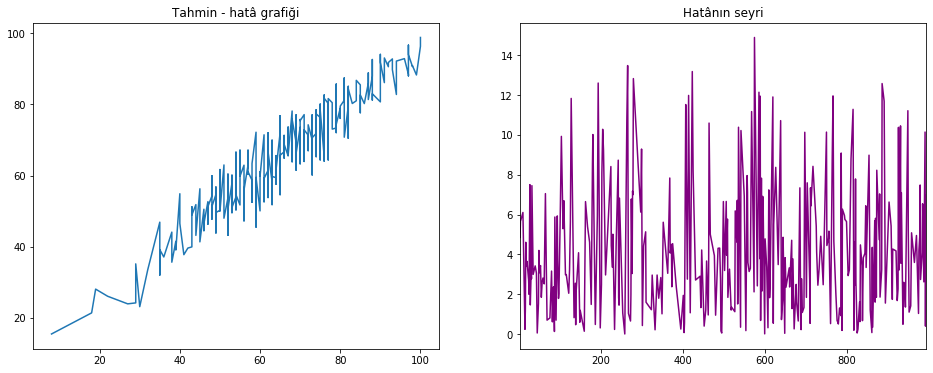

In [936]:
#Şimdi de grafik üzerinde bakmaya çalışalım.
#Önemli detay : Matplotlib grafiği 0'dan başlayarak çizdiğinden dolayı grafiğin düzgün görünmesi için değerleri sıralamalıyız:
sortedDfResult = seriesResult.sort_values(by = seriesResult.columns[0], axis = 0)
py.figure(figsize = (16, 6))#Grafik boyutunu büyütelim
py.subplot(1,2,1)
py.plot(sortedDfResult["gerçek"], sortedDfResult["tahmin"])
py.title("Tahmin - hatâ grafiği")
py.subplot(1,2,2)
py.title("Hatânın seyri")
#Önemli detay : Yalnzca hatâları çizdirmek istediğimizde, hatâları indekse göre sıralamalıyız:
sortedDfResult["hata"].sort_index().plot(color = "purple", label = "hata")
py.savefig("DoğrusalBağlanım - TahminHataDeğişimi", dpi = 220)

Grafikten anlaşılana göre tahmin modelimiz fenâ değil ve veriler doğrusala yatkın bir hâlde duruyor.
Başka bir modelle daha başarılı sonuçlar elde edebiliriz
Şimdi sayısal tahmin için başka bir model geliştirmeye çalışalım
Deneyebileceğimiz bir model 'polinomal bağlanım' olabilir

In [859]:
#Polinomal bağlanım:
# Sci - kit learn kütüphânesinde polinomal bağlanım oluşturmanın yolu verileri polinomal olarak dönüştürüp, doğrusal bağlanım..
#.. oluşturmak:
from sklearn.preprocessing import PolynomialFeatures
polyRegression = PolynomialFeatures(degree = 2)#İkinci dereceden bir polinom olarak deneyelim
lr2 = LinearRegression()

polyXTrain = polyRegression.fit_transform(xTrain)
lr2.fit(polyXTrain, yTrain)
polyPredicts = lr2.predict(polyRegression.fit_transform(xTest))

In [887]:
polyDf = pa.DataFrame(index = yTest.index, columns = ["gerçek"], data = yTest.values)
polyDf["tahmin"] = polyPredicts
polyDf["hata"] = nm.absolute(yTest - polyPredicts)
polyDf

,gerçek,tahmin,hata
2,90,84.588862,5.411138
3,47,53.342826,6.342826
4,76,82.103364,6.103364
518,66,67.242253,1.242253
519,67,65.346961,1.653039
...,...,...,...
912,52,53.887499,1.887499
892,50,56.178853,6.178853
17,18,20.794149,2.794149
442,59,64.239692,5.239692


In [876]:
print("Hatâların ortalaması yaklaşık : ",round(polyDf["hata"].mean(), 3))

Hatâların ortalaması yaklaşık :  4.451


Görüldüğü üzere verilerimiz matematik dersi için oldukça doğrusal; bu yüzden de 'polinomal bağlanım'la hatâ oranı düşmedi 

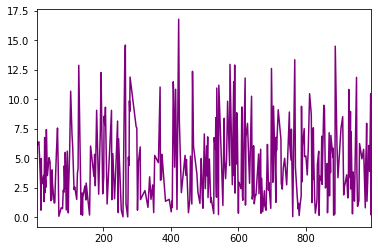

In [882]:
polyDf["hata"].sort_index().plot(color = "purple")

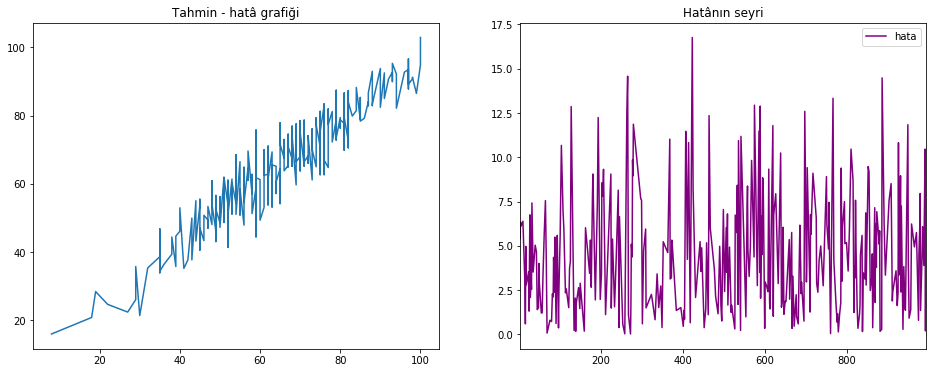

In [935]:
sortedPolyDf = polyDf.sort_values(by = polyDf.columns[0], axis = 0)
py.figure(figsize = (16, 6))
py.subplot(1,2,1)
py.plot(sortedPolyDf["gerçek"], sortedPolyDf["tahmin"])
py.title("Tahmin - hatâ grafiği")
py.subplot(1,2,2)
sortedPolyDf["hata"].sort_index().plot(color = "purple", label = 'hata')
py.title("Hatânın seyri")
py.legend()
py.savefig("PolinomalBağlanım - TahminHataDeğişimi", dpi = 220)

In [1066]:
# Yeni tahmîn modelimizde başarı sınıflarını tahmîn etmeye çalışalım:
# Bunun için verileri hâzırlayalım:

answerForClassify = mergedData["math success level"]
dataForClassify = mergedData.drop(["math score", "math success level", "reading success level", "writing success level"], axis = 1)
dataForClassify
answerForClassify = answerForClassify

In [1067]:
def convertToOrdinal(series, dictOfClasses = None):#series = pa.Series olmalı, dictOfClasses içerisinde değer, sınıf olmalı; eğer dictOfClasses verilmediyse kaç değer olduğunu elimizle saymalıyız
    if dictOfClasses is None:
        valueCount = series.nunique()
        values = {}
        nameOfValues = series.unique()
        for i in range(0, valueCount):
            values[str(nameOfValues[i])] = i
    else:
        valueCount = len(dictOfClasses)
        values = dictOfClasses
    retValue = pa.Series(index = series.index, data = [i for i in range(0, len(series))])
    count = 0
    for i in series.iloc[:]:
        retValue.iloc[count] = values.get(i)
        count += 1
    return retValue

In [1068]:
# Sınıflar arasında bir büyüklük ilişkisi olduğundan sınıfları sıralı vektöre çevirebiliriz.
dictOfClasses = {'too bad mark': 0, 'bad mark': 1, 'medium': 2,  'good': 3, 'very good': 4}
answerForClassify = convertToOrdinal(answerForClassify, dictOfClasses)
answerForClassify.head()

0    3
1    2
2    4
3    2
4    3
dtype: int64

In [1069]:
xTrainClassify, xTestClassify, yTrainClassify, yTestClassify = splitData (xData = dataForClassify, yData = answerForClassify, testRate = 0.33)

In [1070]:
# SINIFLANDIRMA
# Lojistik bağlanım
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state = 1)
logReg.fit(xTrainClassify, yTrainClassify)

logRegPredicts = logReg.predict(xTest)
logRegPredicts

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2,
       3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2,
       2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2,
       3, 2, 2, 3, 3, 4, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2,
       2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2,

In [1090]:
# sklearn kütüphânesinin ölçüm yöntemini kullanalım; aynı zamânda biz de hesaplayalım

from sklearn.metrics import accuracy_score
result = accuracy_score(yTestClassify, logRegPredicts)
print("Doğru bilme oranı (yüzde) : ", round(result * 100, 3))

Doğru bilme oranı (yüzde) :  41.212


In [1080]:
errorClassify = [False for i in range(0,len(logRegPredicts))]
nmArrayYTest = yTestClassify.values
for i in range(0,len(logRegPredicts)):
    if nmArrayYTest[i] == logRegPredicts[i]:
        errorClassify[i] = True

In [1089]:
rate = errorClassify.count(True) / len(errorClassify)
print("Doğru bilme oranı (yüzde): ", round(rate * 100, 3))

Doğru bilme oranı (yüzde):  41.212


In [1132]:
# SINIFLANDIRMA
# K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)# Varsayılan ölçüm birimi Minkowski imiş
knn.fit(xTrainClassify, yTrainClassify)

knnPredicts = knn.predict(xTest)

In [1133]:
knnResult = accuracy_score(yTestClassify, knnPredicts)
print("K - NN ile sınıflandırmada doğru bilme oranı (yüzde) : ", round(result * 100, 3))

K - NN ile sınıflandırmada doğru bilme oranı (yüzde) :  41.212


Lojistik bağlanımla ile yapılan sınıf tahmîninden biraz daha düşük bir başarı elde ediliyor; yukarıdaki kodda 'result' değişkenini yazdırmışım; 'knnResult' değişkenini yazdırmalıydım; kod tekrar çalıştırılmadan önce burası değiştirilmeli.

In [1096]:
# Önceki tahmînimizi sınıflara bölersek hangi tahmîn modelinin sınıflandırmada daha başarılı olduğuna bakabiliriz:
testDataLevelAttribute = mergedData["math success level"].iloc[seriesResult.index.to_list()]
seriesResult["math success level"] = testDataLevelAttribute

In [1124]:
def getLevelOfSuccess(score):
    if score < 25:
        return "too bad mark"
    if score < 45:
        return "bad mark"
    if score < 70:
        return "medium"
    if score < 85:
        return "good"
    return "very good"

arrPredicts = seriesResult['tahmin'].values
arrRealClasses = seriesResult['math success level'].values
liResults = [False for i in range(0, len(arrPredicts))]
count = 0
for i, j in zip(arrPredicts, arrRealClasses):
    print(i,"\t?=\t", j)
    if(getLevelOfSuccess(i) == j):
        liResults[count] = True
    count += 1

85.14852761296778 	?=	 very good
52.67733534006032 	?=	 medium
81.7272266912124 	?=	 good
44.10575723032464 	?=	 bad mark
50.23600735699982 	?=	 medium
70.2876965909629 	?=	 medium
92.60734140019733 	?=	 very good
21.41218485161646 	?=	 too bad mark
50.352227171284206 	?=	 medium
66.30100318977655 	?=	 medium
75.9948747146642 	?=	 good
61.49655428828446 	?=	 medium
65.53752790138088 	?=	 medium
65.02207483030801 	?=	 medium
66.21851375733931 	?=	 medium
55.54806319601404 	?=	 medium
94.00465185323364 	?=	 very good
60.42268122447801 	?=	 medium
56.06512088904835 	?=	 medium
49.94705974582626 	?=	 medium
67.54057326673102 	?=	 medium
61.19897469823522 	?=	 medium
85.07828522287275 	?=	 good
49.56080910736874 	?=	 medium
72.8463359595867 	?=	 good
79.39319413604446 	?=	 good
60.81085985347917 	?=	 medium
41.51897437079015 	?=	 bad mark
51.9474815086687 	?=	 medium
41.37081805046002 	?=	 medium
60.30083190608849 	?=	 medium
43.1904874342727 	?=	 bad mark
65.16202089539917 	?=	 medium
49.6

In [1130]:
countFalse = liResults.count(False)
accPercent = 100 - (round (countFalse / len(seriesResult) * 100, 3))
print("Bağlanım modeliyle başarı seviyesini tahmîn etmede", countFalse, "adet yanlış sınıf tahmîni var")
print("Bağlanım modeliyle not tahmîni sonrasında sınıflara ayırmada doğruluk oranı : ", accPercent)

Bağlanım modeliyle başarı seviyesini tahmîn etmede 66 adet yanlış sınıf tahmîni var
Bağlanım modeliyle not tahmîni sonrasında sınıflara ayırmada doğruluk oranı :  80.0


Görülen o ki, başarı seviyelerine göre sınıflara ayırıp, başarı seviyesi sınıfı tahmîni yapmaktansa notu tahmîn etmek daha iyi bir fikir